# 04 — Experimentos finales y exportables (figuras + tablas)

In [1]:
from pathlib import Path
import sys
PROJECT_ROOT = Path.cwd().parent
SRC = PROJECT_ROOT / "src"
if str(SRC) not in sys.path:
    sys.path.insert(0, str(SRC))
print("Using SRC:", SRC)

import os, csv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sd_model.params import Params
from sd_model.experiments import (
    base_run, no_delay_run, deload_toggle_run, constant_A_run, metrics,
    scenario_microlesion, scenario_stagnation, sweep_beta_phi
)

ROOT = Path.cwd().parent
FIGS = ROOT / "reports" / "figs"
TABLES = ROOT / "reports" / "tables"
FIGS.mkdir(parents=True, exist_ok=True)
TABLES.mkdir(parents=True, exist_ok=True)

def savefig(name):
    p = FIGS / name
    plt.savefig(p, dpi=130, bbox_inches="tight")
    print("Saved figure:", p)


Using SRC: c:\Users\DELL I7\OneDrive\UVG\OCTAVO SEMESTRE\MODELACION Y SIMULACION\PROYECTO_FINAL\muscle_adaptation_project_v3\BORRADORProyectoModSim\src


## A) SEIR vs SIR (sin retraso)

Saved figure: c:\Users\DELL I7\OneDrive\UVG\OCTAVO SEMESTRE\MODELACION Y SIMULACION\PROYECTO_FINAL\muscle_adaptation_project_v3\BORRADORProyectoModSim\reports\figs\A_R_contra_sin_retraso.png


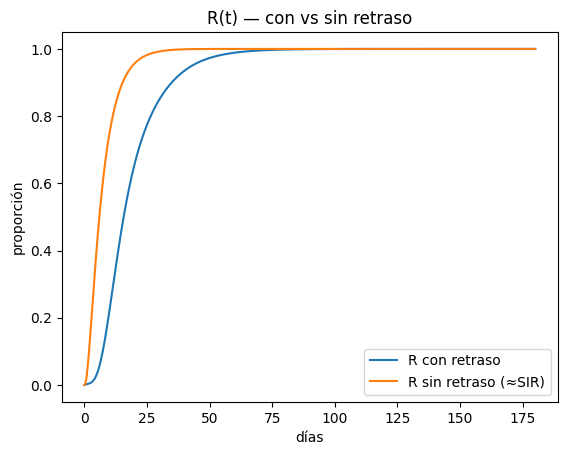

In [2]:

p = Params()
out = base_run(p)
out_nd = no_delay_run(p)

plt.figure()
plt.plot(out["t"], out["R"], label="R con retraso")
plt.plot(out_nd["t"], out_nd["R"], label="R sin retraso (≈SIR)")
plt.title("R(t) — con vs sin retraso")
plt.xlabel("días"); plt.ylabel("proporción"); plt.legend(); 
savefig("A_R_contra_sin_retraso.png")


## B) Deload ON vs OFF

Saved table: c:\Users\DELL I7\OneDrive\UVG\OCTAVO SEMESTRE\MODELACION Y SIMULACION\PROYECTO_FINAL\muscle_adaptation_project_v3\BORRADORProyectoModSim\reports\tables\B_metricas_deload.csv
Saved figure: c:\Users\DELL I7\OneDrive\UVG\OCTAVO SEMESTRE\MODELACION Y SIMULACION\PROYECTO_FINAL\muscle_adaptation_project_v3\BORRADORProyectoModSim\reports\figs\B_M_deload_on_off.png


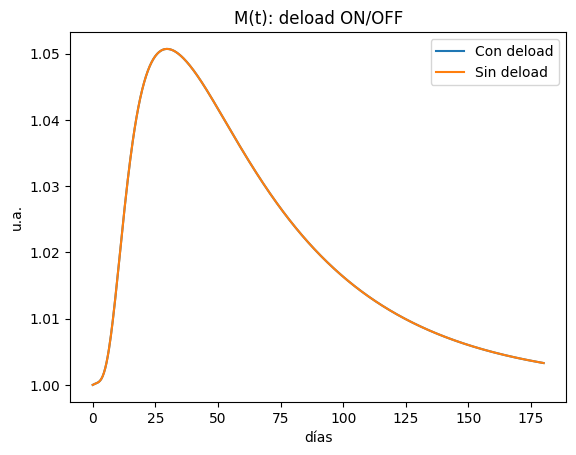

In [3]:

on = deload_toggle_run(True, p)
off = deload_toggle_run(False, p)

m_on = metrics(on, M0=p.M0)
m_off = metrics(off, M0=p.M0)

# Tabla CSV
import csv
with open(TABLES / "B_metricas_deload.csv", "w", newline="", encoding="utf-8") as f:
    w = csv.DictWriter(f, fieldnames=m_on.keys())
    w.writeheader()
    w.writerow(m_on)
    w.writerow(m_off)
print("Saved table:", TABLES / "B_metricas_deload.csv")

plt.figure()
plt.plot(on["t"], on["M"], label="Con deload")
plt.plot(off["t"], off["M"], label="Sin deload")
plt.title("M(t): deload ON/OFF"); plt.xlabel("días"); plt.ylabel("u.a."); plt.legend();
savefig("B_M_deload_on_off.png")


## C) Adherencia alta vs baja

Saved table: c:\Users\DELL I7\OneDrive\UVG\OCTAVO SEMESTRE\MODELACION Y SIMULACION\PROYECTO_FINAL\muscle_adaptation_project_v3\BORRADORProyectoModSim\reports\tables\C_metricas_adherencia.csv
Saved figure: c:\Users\DELL I7\OneDrive\UVG\OCTAVO SEMESTRE\MODELACION Y SIMULACION\PROYECTO_FINAL\muscle_adaptation_project_v3\BORRADORProyectoModSim\reports\figs\C_M_adherencia.png


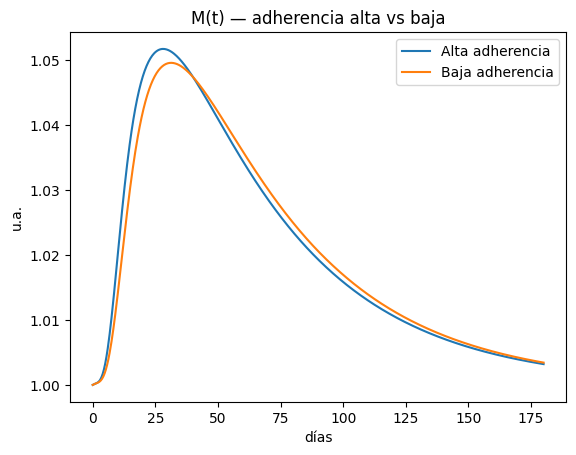

In [4]:

hi = constant_A_run(adh=0.95, inten=1.2, prot=1.0, params=p)
lo = constant_A_run(adh=0.60, inten=0.9, prot=0.9, params=p)

with open(TABLES / "C_metricas_adherencia.csv", "w", newline="", encoding="utf-8") as f:
    import csv
    from sd_model.experiments import metrics
    w = csv.DictWriter(f, fieldnames=metrics(hi).keys())
    w.writeheader()
    w.writerow(metrics(hi, M0=p.M0))
    w.writerow(metrics(lo, M0=p.M0))
print("Saved table:", TABLES / "C_metricas_adherencia.csv")

plt.figure()
plt.plot(hi["t"], hi["M"], label="Alta adherencia")
plt.plot(lo["t"], lo["M"], label="Baja adherencia")
plt.title("M(t) — adherencia alta vs baja")
plt.xlabel("días"); plt.ylabel("u.a."); plt.legend();
savefig("C_M_adherencia.png")


## D) Microlesión (pulso en φ) y estancamiento (decae β)

Saved figure: c:\Users\DELL I7\OneDrive\UVG\OCTAVO SEMESTRE\MODELACION Y SIMULACION\PROYECTO_FINAL\muscle_adaptation_project_v3\BORRADORProyectoModSim\reports\figs\D_M_microlesion_estancamiento.png


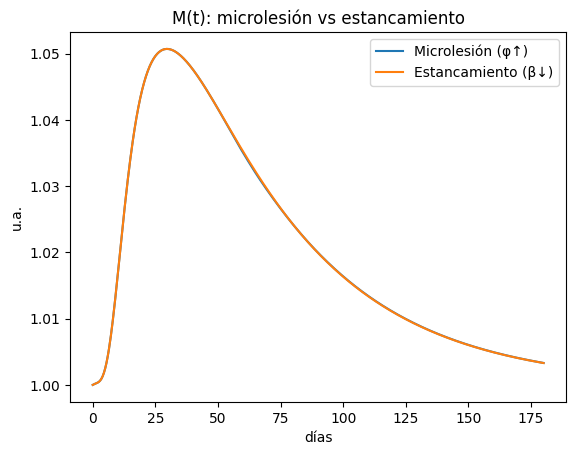

In [5]:

mic = scenario_microlesion(p)
stg = scenario_stagnation(p)

plt.figure()
plt.plot(mic["t"], mic["M"], label="Microlesión (φ↑)")
plt.plot(stg["t"], stg["M"], label="Estancamiento (β↓)")
plt.title("M(t): microlesión vs estancamiento"); plt.xlabel("días"); plt.ylabel("u.a."); plt.legend();
savefig("D_M_microlesion_estancamiento.png")


## E) Sensibilidad (heatmap M(T) vs β, φ)

Saved figure: c:\Users\DELL I7\OneDrive\UVG\OCTAVO SEMESTRE\MODELACION Y SIMULACION\PROYECTO_FINAL\muscle_adaptation_project_v3\BORRADORProyectoModSim\reports\figs\E_heatmap_beta_phi.png


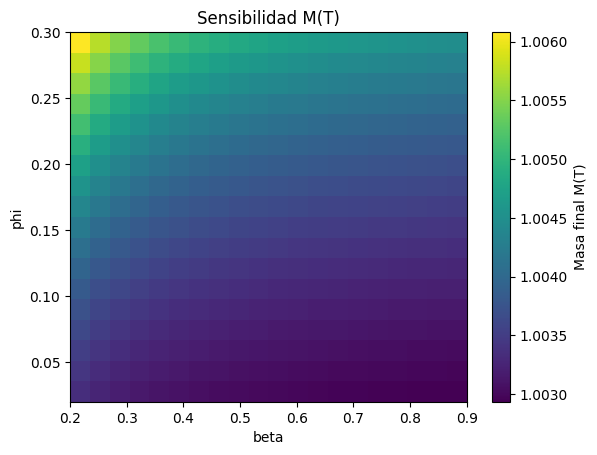

In [6]:

beta_vals = np.linspace(0.2, 0.9, 20)
phi_vals = np.linspace(0.02, 0.30, 18)
grid = sweep_beta_phi(beta_vals, phi_vals, p)

plt.figure()
im = plt.imshow(grid.T, origin="lower", aspect="auto",
                extent=[beta_vals[0], beta_vals[-1], phi_vals[0], phi_vals[-1]])
plt.colorbar(im, label="Masa final M(T)")
plt.xlabel("beta"); plt.ylabel("phi"); plt.title("Sensibilidad M(T)"); 
savefig("E_heatmap_beta_phi.png")
